In [4]:
import pandas as pd

Run below to connect to drive in colab environment

In [2]:
# Mount google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Path of directory
drive_path = "/content/drive/MyDrive"
root_path = f"{drive_path}/master/code-data/mxene_solvent"
solvent_path = f"{drive_path}/master/code-data/solvent"

In [5]:
# Load data
df_mx_solvent_data_labeled = pd.read_pickle(f"{root_path}/008_dataset_mx_solvent_using_hsp.pkl")
df_mx_solvent_data_labeled.columns = df_mx_solvent_data_labeled.columns.str.lower()
print(df_mx_solvent_data_labeled.shape)
df_mx_solvent_data_labeled.head()

(653, 63)


,mx,method,solvent,label,inchikey,δd,δp,δh,molarvolume,gap_oh,...,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,isotope_atom_count,atom_stereo_count,bond_stereo_count,covalent_unit_count,boiling_point,mmhg
0,Ti3C2,HF,water,1,XLYOFNOQVPJJNP-UHFFFAOYSA-N,15.5,16.0,42.3,18.0,0.0,...,1,1,0,1,0,0,0,1,373.2,760.0
1,Ti3C2,HF,ethanol,1,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,15.8,8.8,19.4,58.5,0.0,...,1,1,0,3,0,0,0,1,351.5,760.0
2,Ti3C2,HF,methanol,-1,OKKJLVBELUTLKV-UHFFFAOYSA-N,15.1,12.3,22.3,40.7,0.0,...,1,1,0,2,0,0,0,1,337.8,760.0
3,Ti3C2,HF,acetone,-1,CSCPPACGZOOCGX-UHFFFAOYSA-N,15.5,10.4,7.0,74.0,0.0,...,0,1,0,4,0,0,0,1,329.3,760.0
4,Ti3C2,HF,acetonitrile,-1,WEVYAHXRMPXWCK-UHFFFAOYSA-N,15.3,18.0,6.1,52.6,0.0,...,0,1,0,3,0,0,0,1,354.8,760.0


Else run the below to use in local environment

In [2]:
root_path = f"../../data"

In [5]:
# Load data
df_mx_solvent_data_labeled = pd.read_excel(f"{root_path}/dataset_mx_solvent_using_hsp.xlsx")
df_mx_solvent_data_labeled.columns = df_mx_solvent_data_labeled.columns.str.lower()
print(df_mx_solvent_data_labeled.shape)
df_mx_solvent_data_labeled.head()

(653, 64)


,unnamed: 0,mx,method,solvent,label,inchikey,δd,δp,δh,molarvolume,...,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,isotope_atom_count,atom_stereo_count,bond_stereo_count,covalent_unit_count,boiling_point,mmhg
0,0,Ti3C2,HF,water,1,XLYOFNOQVPJJNP-UHFFFAOYSA-N,15.5,16.0,42.3,18.0,...,1,1,0,1,0,0,0,1,373.2,760
1,1,Ti3C2,HF,ethanol,1,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,15.8,8.8,19.4,58.5,...,1,1,0,3,0,0,0,1,351.5,760
2,2,Ti3C2,HF,methanol,-1,OKKJLVBELUTLKV-UHFFFAOYSA-N,15.1,12.3,22.3,40.7,...,1,1,0,2,0,0,0,1,337.8,760
3,3,Ti3C2,HF,acetone,-1,CSCPPACGZOOCGX-UHFFFAOYSA-N,15.5,10.4,7.0,74.0,...,0,1,0,4,0,0,0,1,329.3,760
4,4,Ti3C2,HF,acetonitrile,-1,WEVYAHXRMPXWCK-UHFFFAOYSA-N,15.3,18.0,6.1,52.6,...,0,1,0,3,0,0,0,1,354.8,760


Main body of code

In [6]:
cols_to_keep = [col for col in df_mx_solvent_data_labeled.columns if not (df_mx_solvent_data_labeled[col].nunique() <= 1)]

In [7]:
df_mx_solvent_data_labeled = df_mx_solvent_data_labeled[cols_to_keep]


In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [9]:
df_mx_solvent_data_labeled['method'] = df_mx_solvent_data_labeled['method'].astype('category').cat.codes

In [10]:
df_mx_solvent_data_labeled.head()

,unnamed: 0,mx,method,solvent,label,inchikey,δd,δp,δh,molarvolume,...,molecular_weight,xlogp,tpsa,complexity,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,atom_stereo_count,boiling_point
0,0,Ti3C2,0,water,1,XLYOFNOQVPJJNP-UHFFFAOYSA-N,15.5,16.0,42.3,18.0,...,18.015,-0.5,1.0,0.0,1,1,0,1,0,373.2
1,1,Ti3C2,0,ethanol,1,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,15.8,8.8,19.4,58.5,...,46.070,-0.1,20.2,2.8,1,1,0,3,0,351.5
2,2,Ti3C2,0,methanol,-1,OKKJLVBELUTLKV-UHFFFAOYSA-N,15.1,12.3,22.3,40.7,...,32.042,-0.5,20.2,2.0,1,1,0,2,0,337.8
3,3,Ti3C2,0,acetone,-1,CSCPPACGZOOCGX-UHFFFAOYSA-N,15.5,10.4,7.0,74.0,...,58.080,-0.1,17.1,26.3,0,1,0,4,0,329.3
4,4,Ti3C2,0,acetonitrile,-1,WEVYAHXRMPXWCK-UHFFFAOYSA-N,15.3,18.0,6.1,52.6,...,41.050,0.0,23.8,29.3,0,1,0,3,0,354.8


In [11]:
features = ['method', 'δd', 'δp', 'δh', 'molarvolume', 'work_function_oh',
   'formation_energy_oh', 'ehull_oh', 'alphax_el_oh', 'alphay_el_oh', 'alphaz_el_oh',
   'plasmafrequency_x_oh', 'plasmafrequency_y_oh', 'has_inversion_symmetry_oh',
   'gap_o', 'work_function_o', 'formation_energy_o', 'ehull_o',
   'alphax_el_o', 'alphay_el_o', 'alphaz_el_o', 'plasmafrequency_x_o', 'plasmafrequency_y_o',
    'has_inversion_symmetry_o', 'work_function_f',
   'formation_energy_f', 'ehull_f', 'alphax_el_f', 'alphay_el_f', 'alphaz_el_f', 'plasmafrequency_x_f',
   'plasmafrequency_y_f', 'has_inversion_symmetry_f',
   'molecular_weight', 'xlogp',  'tpsa', 'complexity', 'h_bond_donor_count', 'h_bond_acceptor_count',
   'rotatable_bond_count', 'heavy_atom_count',  'atom_stereo_count',
    'boiling_point']
X = df_mx_solvent_data_labeled[features]
y = df_mx_solvent_data_labeled['label']

In [12]:
X['molecular_weight'] = pd.to_numeric(X['molecular_weight'], errors='coerce')

C:\Users\liamr\AppData\Local\Temp\ipykernel_2668\2546690500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['molecular_weight'] = pd.to_numeric(X['molecular_weight'], errors='coerce')


In [13]:
X.head()

,method,δd,δp,δh,molarvolume,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,...,molecular_weight,xlogp,tpsa,complexity,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,atom_stereo_count,boiling_point
0,0,15.5,16.0,42.3,18.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,18.015,-0.5,1.0,0.0,1,1,0,1,0,373.2
1,0,15.8,8.8,19.4,58.5,1.985656,-1.294839,0.123329,32.369286,32.369286,...,46.070,-0.1,20.2,2.8,1,1,0,3,0,351.5
2,0,15.1,12.3,22.3,40.7,1.985656,-1.294839,0.123329,32.369286,32.369286,...,32.042,-0.5,20.2,2.0,1,1,0,2,0,337.8
3,0,15.5,10.4,7.0,74.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,58.080,-0.1,17.1,26.3,0,1,0,4,0,329.3
4,0,15.3,18.0,6.1,52.6,1.985656,-1.294839,0.123329,32.369286,32.369286,...,41.050,0.0,23.8,29.3,0,1,0,3,0,354.8


In [14]:
y.head()

0    1
1    1
2   -1
3   -1
4   -1
Name: label, dtype: int64

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
mask_pos = y == 1
mask_neg = y == -1
mask_unlabeled = y == 0


In [17]:
X_train = X_scaled[mask_pos | mask_neg]
y_train = y[mask_pos | mask_neg]

In [18]:
X_test = X_scaled[mask_unlabeled]
df_unlabeled = df_mx_solvent_data_labeled[mask_unlabeled].copy()

In [19]:
clf = SVC(kernel='linear', C=1.0, gamma='scale', probability=True)
clf.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [20]:
proba_unlabeled = clf.predict_proba(X_test)[:, 1]  # Probability of class 1 (positive)
df_unlabeled['predicted_proba'] = proba_unlabeled
df_unlabeled['predicted_label'] = (proba_unlabeled >= 0.5).astype(int)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

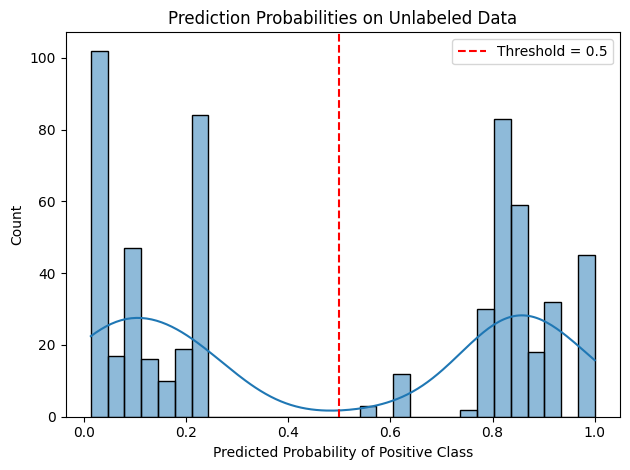

In [22]:
sns.histplot(proba_unlabeled, bins=30, kde=True)
plt.axvline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.title("Prediction Probabilities on Unlabeled Data")
plt.xlabel("Predicted Probability of Positive Class")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
high_conf = df_unlabeled[df_unlabeled['predicted_proba'] >= 0.9]
top_10 = high_conf.sort_values(by='predicted_proba', ascending=False).head(20)
print(top_10[['solvent', 'mx', 'predicted_proba']])

               solvent     mx  predicted_proba
285  diethylene glycol  Mo2C1         0.999998
286  diethylene glycol  Mo2C1         0.999998
128  diethylene glycol  Nb2C1         0.999997
129  diethylene glycol  Nb2C1         0.999997
206  diethylene glycol   V2C1         0.999997
207  diethylene glycol   V2C1         0.999997
522  diethylene glycol   V4C3         0.999997
523  diethylene glycol   V4C3         0.999997
601  diethylene glycol  Ta4C3         0.999997
602  diethylene glycol  Ta4C3         0.999997
364  diethylene glycol  Ti2C1         0.999997
365  diethylene glycol  Ti2C1         0.999997
443  diethylene glycol  Zr3C2         0.999996
444  diethylene glycol  Zr3C2         0.999996
76   diethylene glycol  Ti3C2         0.999996
283          formamide  Mo2C1         0.999984
284          formamide  Mo2C1         0.999984
126          formamide  Nb2C1         0.999982
127          formamide  Nb2C1         0.999982
204          formamide   V2C1         0.999982


In [24]:
low_conf = df_unlabeled[df_unlabeled['predicted_proba'] <= 0.1]
bottom_10 = low_conf.sort_values(by='predicted_proba', ascending=True).head(20)

print("MXene-solvent pairs predicted to NOT work at all (P ≤ 0.1):")
print(bottom_10[['mx', 'solvent', 'predicted_proba']])

MXene-solvent pairs predicted to NOT work at all (P ≤ 0.1):
        mx             solvent  predicted_proba
86   Ti3C2  Tetrachloromethane         0.013775
464  Zr3C2  Tetrachloromethane         0.013775
463  Zr3C2  Tetrachloromethane         0.013776
438  Zr3C2            n-Hexane         0.015513
437  Zr3C2            n-Hexane         0.015514
385  Ti2C1  Tetrachloromethane         0.016770
384  Ti2C1  Tetrachloromethane         0.016771
622  Ta4C3  Tetrachloromethane         0.017116
621  Ta4C3  Tetrachloromethane         0.017117
79   Ti3C2     Dichloromethane         0.017208
450  Zr3C2     Dichloromethane         0.017209
449  Zr3C2     Dichloromethane         0.017209
543   V4C3  Tetrachloromethane         0.017230
542   V4C3  Tetrachloromethane         0.017230
227   V2C1  Tetrachloromethane         0.017286
226   V2C1  Tetrachloromethane         0.017287
149  Nb2C1  Tetrachloromethane         0.017573
148  Nb2C1  Tetrachloromethane         0.017573
306  Mo2C1  Tetrachlorometha

In [25]:
print("\n=== Summary of predicted probabilities on unlabeled data ===")
print(df_unlabeled['predicted_proba'].describe())

# Count how many samples fall into different confidence zones
bins = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
labels = ['Very Low (≤0.1)', 'Low (0.1–0.3)', 'Mid (0.3–0.5)',
          'High (0.5–0.7)', 'Very High (0.7–0.9)', 'Extremely High (>0.9)']

df_unlabeled['confidence_bin'] = pd.cut(df_unlabeled['predicted_proba'], bins=bins, labels=labels, include_lowest=True)
print("\n=== Prediction count by confidence bin ===")
print(df_unlabeled['confidence_bin'].value_counts().sort_index())


=== Summary of predicted probabilities on unlabeled data ===
count    579.000000
mean       0.478710
std        0.380927
min        0.013775
25%        0.103484
50%        0.235315
75%        0.836379
max        0.999998
Name: predicted_proba, dtype: float64

=== Prediction count by confidence bin ===
confidence_bin
Very Low (≤0.1)          138
Low (0.1–0.3)            157
Mid (0.3–0.5)              0
High (0.5–0.7)            15
Very High (0.7–0.9)      192
Extremely High (>0.9)     77
Name: count, dtype: int64


Again, use the below if running in colab

In [29]:
train_path = f"{drive_path}/master/code-data/training/"

In [ ]:
df_unlabeled.to_csv(f"{train_path}/003_positive_vs_negative_predictions_on_unlabeled_svc.csv")
df_unlabeled.to_pickle(f"{train_path}/003_positive_vs_negative_predictions_on_unlabeled_svc.pkl")


If running locally, use the below

In [26]:
df_unlabeled.to_csv(f"003_positive_vs_negative_predictions_on_unlabeled_svc.csv")
df_unlabeled.to_pickle(f"003_positive_vs_negative_predictions_on_unlabeled_svc.pkl")

Main body of code

                                             Feature    Importance
boiling_point                          boiling_point  1.107215e+00
molarvolume                              molarvolume  8.954978e-01
tpsa                                            tpsa  7.899856e-01
xlogp                                          xlogp  5.845287e-01
δh                                                δh  5.806404e-01
h_bond_donor_count                h_bond_donor_count  5.305686e-01
h_bond_acceptor_count          h_bond_acceptor_count  5.159467e-01
rotatable_bond_count            rotatable_bond_count  4.828778e-01
molecular_weight                    molecular_weight  3.488536e-01
heavy_atom_count                    heavy_atom_count  2.951018e-01
δp                                                δp  1.593238e-01
complexity                                complexity  5.205349e-02
δd                                                δd  2.771773e-02
has_inversion_symmetry_f    has_inversion_symmetry_f  1.465210

C:\Users\liamr\AppData\Local\Temp\ipykernel_2668\2027487603.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


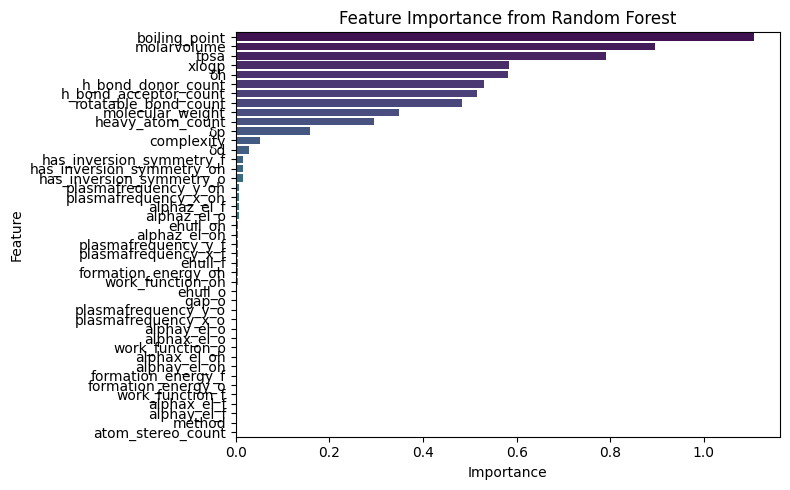

In [ ]:
feature_names = features
importances = pd.Series(abs(clf.coef_[0]), index=feature_names)

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp_df)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance from SVC')
plt.tight_layout()
plt.show()

Top 10 Feature Importances:
                                     Feature  Importance
boiling_point                  boiling_point    1.107215
molarvolume                      molarvolume    0.895498
tpsa                                    tpsa    0.789986
xlogp                                  xlogp    0.584529
δh                                        δh    0.580640
h_bond_donor_count        h_bond_donor_count    0.530569
h_bond_acceptor_count  h_bond_acceptor_count    0.515947
rotatable_bond_count    rotatable_bond_count    0.482878
molecular_weight            molecular_weight    0.348854
heavy_atom_count            heavy_atom_count    0.295102


C:\Users\liamr\AppData\Local\Temp\ipykernel_2668\3810259604.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='mako')


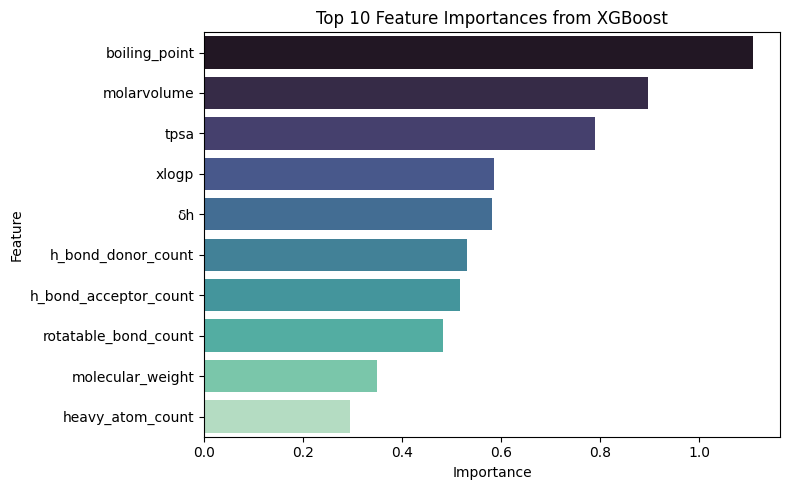

In [ ]:

# Create and sort feature importance DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)  # Change to .head(15) for top 15

# Print top features
print("Top 10 Feature Importances:")
print(feat_imp_df)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='mako')
plt.title('Top 10 Feature Importances from SVC')
plt.tight_layout()
plt.show()